In [1]:
import librosa as lr
import librosa.display as lrd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

import sys
sys.path.append("..")
from libs.utilities import load_autoencoder_lossfunc, load_autoencoder_model
from libs.processing import pink_noise, take_file_as_noise 

SNR_dB = 10

Using TensorFlow backend.
/home/christie/miniconda3/envs/denoising/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
noise_filepath = '/data/riccardo_datasets/demand/SPSQUARE/ch01.wav' 
# '/data/riccardo_datasets/npr_news/train/newscast230831.wav'
# '/data/riccardo_datasets/npr_news/20180326_me_birth_control_apps_find_a_big_market_in_contraception_deserts_.wav'
input_path = '/data/riccardo_datasets/npr_news/train/newscast220831.wav'


In [3]:
### INPUT PROCESSING ###
print('[dn] Loading data from {}...'.format(input_path))
# load data from file name
x, sr = lr.load(input_path, sr=None, offset=10, duration = 60)
s = np.abs(lr.stft(x))

[dn] Loading data from /data/riccardo_datasets/npr_news/train/newscast220831.wav...


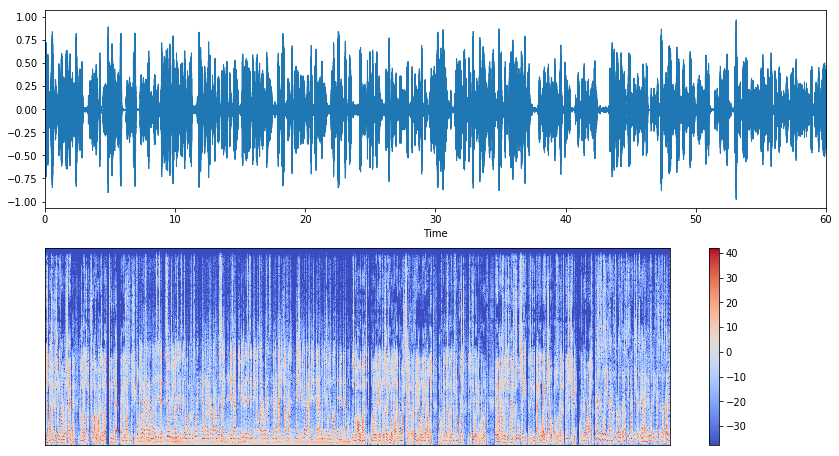

In [4]:
# Display time + frequency representations + audio
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.waveplot(x, sr=sr)
plt.subplot(212)
lrd.specshow(lr.amplitude_to_db(s)) #, cmap='coolwarm'
plt.colorbar()
ipd.Audio(x, rate=sr)

In [5]:
### Calculate noise ###
print('[dn] Loading data from {}...'.format(noise_filepath))
# load data from file name
xn, srn = lr.load(noise_filepath, sr=sr, duration = 10, offset=2)
sn = np.abs(lr.stft(xn))

[dn] Loading data from /data/riccardo_datasets/demand/SPSQUARE/ch01.wav...


In [6]:
x = x[:len(xn)]

x_std = x.std()
xn_std = xn.std()
print(x_std, xn_std)

0.11487707 0.012738943


In [7]:
x_noisy = x + xn
x_noisy_std = x_noisy.std()
print(x_noisy_std)

0.11560436


In [8]:
from libs.processing import sum_with_snr


In [9]:
snr=0
y = sum_with_snr(x, xn, snr)
y_std = y.std()
print(y_std)

0.16260912


In [10]:
### snr_eith AUDIO ###
ipd.Audio(y, rate=sr)

In [11]:
x2 = (x-x.mean())/x.std()
snr=0
y2 = sum_with_snr(x2, xn, snr)
y2_std = y2.std()
print(y2_std)

1.4155052


In [12]:
ipd.Audio(y2, rate=sr)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe76b122860>,
 [<matplotlib.lines.Line2D at 0x7fe76b0cbb38>])

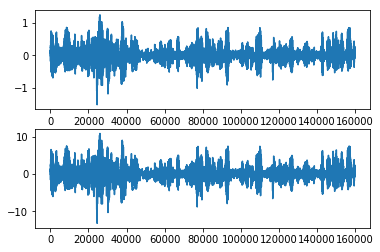

In [16]:
plt.subplot(2,1,1), plt.plot(y) 
plt.subplot(2,1,2), plt.plot(y2)

In [15]:
yy = y/y.std()- y2/y2.std()
yy_mse = (yy**2).mean()
print(yy_mse)

5.388573e-08


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe76b085d30>,
 [<matplotlib.lines.Line2D at 0x7fe768f79eb8>])

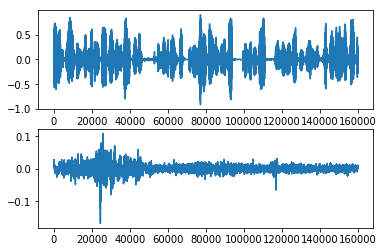

In [17]:
plt.subplot(2,1,1), plt.plot(x) 
plt.subplot(2,1,2), plt.plot(xn)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01, 6.0000e+00,
        5.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.3000e+01,
        2.9000e+01, 2.2000e+01, 7.0000e+00, 1.5000e+01, 1.8000e+01,
        1.3000e+01, 1.4000e+01, 1.0000e+01, 1.7000e+01, 2.0000e+01,
        4.1000e+01, 2.6000e+01, 1.5000e+01, 3.4000e+01, 5.8000e+01,
        9.9000e+01, 1.5500e+02, 2.1600e+02, 2.8200e+02, 2.6600e+02,
        4.3300e+02, 5.8800e+02, 9.4900e+02, 1.3950e+03, 2.4900e+03,
        4.2820e+03, 8.2520e+03, 1.6862e+04, 2.7891e+04, 3.2244e+04,
        2.6455e+04, 1.6382e+04, 8.1830e+03, 4.5530e+03, 2.2810e+03,
        1.6040e+03, 9.6100e+02, 6.3500e+02, 5.2900e+02, 4.0200e+02,
        2.8400e+02, 2.6200e+02, 1.9600e+02, 1.4300e+02, 5.7000e+01,
        7.4000e+01, 4.2000e+01, 5.6000e+01, 3.2000e+01, 1.8000e+01,
        4.0000e+00, 7.0000e+00, 7.0000e+00, 7.00

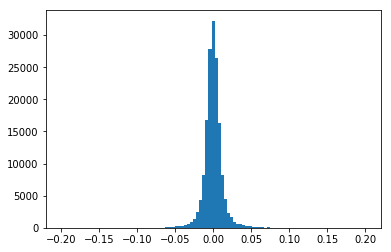

In [21]:
plt.hist(xn.flatten(), bins=np.linspace(-0.2,0.2, 100))

In [32]:
xn1, xn2 = xn[:len(xn)//2] , xn[len(xn)//2:]
xt = x[:len(xn1)]
# xx1 = xn1+x
# xx2 = xn2+x

In [33]:
yn1 = sum_with_snr(xt, xn1, snr)
yn2 = sum_with_snr(xt, xn2, snr)

In [34]:
ipd.Audio(yn1, rate=sr)

In [35]:
ipd.Audio(yn2, rate=sr)